# Regresión Logística

#### Cristina Gómez Alonso y Carlos Tessier Fernández

En este notebook tomaremos como referencia el material del profesor Dr. Tirthajyoti Sarkar donde demuestra como resolver un problema de regresión logística de predicción de Hipotiroidismo con las librerías **Scikit-learn** y **Statsmodels**.

El dataset es original de UCI ML repository.
<br>Link: https://archive.ics.uci.edu/ml/datasets/Thyroid


<img src="https://cdn.prod.website-files.com/5c17fc782f30f90cd15c25b4/63189857cdf8f072fcccfd5e_Thyroid.gif" alt="tiroides gif." width="500">

Explicaciones previas:
* [Glándula tiroides](https://es.wikipedia.org/wiki/Gl%C3%A1ndula_tiroides)
* [Hipotiroidismo](https://www.youtube.com/shorts/XymIVHrJn38) 


### **Variables clínicas**

* **response** → Variable objetivo (0 = normal, 1 = alteración tiroidea).
* **age** → Edad del paciente.
* **sex** → Sexo biológico (M/F).
* **pregnant** → Embarazo (afecta a hormonas tiroideas).

### **Tratamientos / antecedentes**

* **on_thyroxine** → Toma tiroxina (T4) como medicación.
* **query_on_thyroxine** → Se sospecha que debe tomar tiroxina.
* **antithyroid_medication** → Toma medicación antitiroidea.
* **thyroid_surgery** → Ha tenido cirugía de tiroides.
* **query_hypothyroid** → Sospecha de hipotiroidismo.
* **query_hyperthyroid** → Sospecha de hipertiroidismo.

### **Variables de laboratorio**

* **T3_measured** / **T3** → Medición y valor de **T3 total**.
* **TT4_measured** / **TT4** → Medición y valor de **T4 total**.
* **T4U_measured** / **T4U** → Medición y valor del *T4 uptake* (captación).
* **FTI_measured** / **FTI** → Free Thyroxine Index (**estimación de T4 libre**).
* **TBG_measured** / **TBG** → Medición y valor de la Globulina Transportadora de Tiroxina.


En general:

* **TSH alta + FTI bajo → hipotiroidismo clínico**
* **TSH normal/alta + FTI normal → hipotiroidismo subclínico**
* **TSH baja + FTI alto → hipertiroidismo**





## 1. Importación de paquetes y dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'


<div style="background-color:green;color:white">

A partir de la cadena con los nombres de las variables almacenada en la variable names, convierte esa cadena en una lista de nombres de columnas separando por espacios de forma que names pase a ser una lista de strings con cada nombre de variable.


<br>

In [4]:
names = names.split(" ")
print(names)

['response', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine', 'antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid', 'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre', 'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG']


<div style="background-color:green;color:white">

Carga el fichero hypothyroid.csv en un DataFrame de pandas llamado df
* utilizando la lista names como nombres de columnas
* indicando que no hay columna de índice específica
* que el carácter '?' debe tratarse como valor faltante (NaN)

<br>

In [5]:
df = pd.read_csv("./data/hypothyroid.csv",names=names, index_col=False,na_values='?')

In [6]:
# mostrar primeras filas del dataset
df.head()

,response,age,sex,on_thyroxine,query_on_thyroxine,antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,...,y,0.6,y,15.0,y,1.48,y,10.0,n,NaN
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,...,y,1.7,y,19.0,y,1.13,y,17.0,n,NaN
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,...,y,0.2,y,4.0,y,1.00,y,0.0,n,NaN
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,...,y,0.4,y,6.0,y,1.04,y,6.0,n,NaN
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,...,y,1.2,y,57.0,y,1.28,y,44.0,n,NaN


In [7]:
# mostrar dimensiones del dataset
df.shape

(3163, 26)

## 2. Preprocessing


### 2.1. Borrado de columnas innecesarias

<div style="background-color:green;color:white">


Borraremos todas las features que tienen en su nombre la palabra measured o querey ya que son redundantes.

<br>

In [8]:
# Crea una lista vacía donde guardaremos nombres de columnas a eliminar

eliminar = []

# Recorre todos los nombres de columnas del DataFrame 
for col in df.columns:

    # Si el nombre de la columna contiene 'measured' o 'query'
    if "measured" in col or "query" in col:
        
        # Añade ese nombre de columna a la lista con las columnas a eliminar
        eliminar.append(col)

print(eliminar)
        


['query_on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']


<div style="background-color:green;color:white">

Añadir la característica TBG para eliminar

<br>

In [9]:
eliminar.append("TBG")

<div style="background-color:green;color:white">

Eliminar del dataframe todas las características (columnas) guardadas en la lista, modificando el DataFrame directamente sin devolver una copia.

<br>

In [10]:
df = df.drop(columns=eliminar)

In [11]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


<div style="background-color:green;color:white">

Consultamos los valores estadísticos básicos de cada columna. 

<br>

In [12]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,2717.000000,2695.000000,2468.000000,2914.000000,2915.000000,2916.000000
mean,51.154214,5.923180,1.939749,108.850000,0.978199,115.397771
std,19.294405,23.899467,0.996773,45.485419,0.226580,60.239572
min,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,35.000000,0.000000,1.400000,83.000000,0.850000,91.000000
50%,54.000000,0.700000,1.800000,104.000000,0.960000,107.000000
75%,67.000000,2.300000,2.300000,128.000000,1.065000,129.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


<div style="background-color:green;color:white">

mostrarlo de nuevo con la función que permite transponer la matriz resultado y ayuda a la comprensión de dichos valores.

<br>

In [13]:
print(np.transpose(df.describe()))

      count        mean        std  min    25%     50%      75%     max
age  2717.0   51.154214  19.294405  1.0  35.00   54.00   67.000   98.00
TSH  2695.0    5.923180  23.899467  0.0   0.00    0.70    2.300  530.00
T3   2468.0    1.939749   0.996773  0.0   1.40    1.80    2.300   10.20
TT4  2914.0  108.850000  45.485419  2.0  83.00  104.00  128.000  450.00
T4U  2915.0    0.978199   0.226580  0.0   0.85    0.96    1.065    2.21
FTI  2916.0  115.397771  60.239572  0.0  91.00  107.00  129.000  881.00



### 2.2. Tratamiento de missing values

<div style="background-color:green;color:white">

Utiliza la función adecuada de pandas para localizar los valores faltantes y, a continuación, calcula cuántos valores faltantes hay en cada columna.

<br>

In [14]:
df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

<div style="background-color:green;color:white">


Borrar las filas con valores missing ya que desconocemos de conocimiento experto en el área que nos ayude a estimar correctamente dichos valores desconocidos.

<br>

In [15]:
df = df.dropna()
df.isna().sum()

response                  0
age                       0
sex                       0
on_thyroxine              0
antithyroid_medication    0
thyroid_surgery           0
pregnant                  0
sick                      0
tumor                     0
lithium                   0
goitre                    0
TSH                       0
T3                        0
TT4                       0
T4U                       0
FTI                       0
dtype: int64

In [16]:
df.shape
df['response'].unique()

array(['hypothyroid', 'negative'], dtype=object)

### 2.3. Transformación de datos categóricos manualmente

La columna **response** contiene los valores 'hypothyroid' para indicar que el paciente sufre hipertiroidismo y 'negative' para indicar que no.

Podríamos utilizar ``get_dummies`` de pandas:

``df_encoded = pd.get_dummies(df, columns=['response'], prefix='clase')``

Pero en este caso vamos a sustituirlos manualmente los valores numéricos (hypothyroid=1 y negative=0).

<div style="background-color:green;color:white">


Define una función llamada class_convert(response) que reciba como parámetro una cadena de texto y devuelva el valor entero 1 si response es igual a 'hypothyroid', y 0 en cualquier otro caso.

<br>

In [17]:
def class_convert(response):
    if response == "hypothyroid":
        return 1
    else :
        return 0

<div style="background-color:green;color:white">


Aplica la función class_convert a todos los valores de la columna response del DataFrame df para transformar sus valores en 0 o 1, y guarda el resultado de nuevo en la propia columna df['response'].

<br>

In [18]:
df["response"] = df["response"].apply(class_convert)

In [19]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,M,f,f,f,f,f,f,f,f,30.0,0.6,15.0,1.48,10.0
1,1,15.0,F,t,f,f,f,f,f,f,f,145.0,1.7,19.0,1.13,17.0
2,1,24.0,M,f,f,f,f,f,f,f,f,0.0,0.2,4.0,1.00,0.0
3,1,24.0,F,f,f,f,f,f,f,f,f,430.0,0.4,6.0,1.04,6.0
4,1,77.0,M,f,f,f,f,f,f,f,f,7.3,1.2,57.0,1.28,44.0


In [20]:
df.columns

Index(['response', 'age', 'sex', 'on_thyroxine', 'antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')

## 3. Visual EDA

### 3.1. Diagrama de cajas

Un diagrama de caja (en inglés boxplot) es un método estandarizado para representar gráficamente una serie de datos numéricos a través de sus cuartiles. De esta manera, se muestran a simple vista la mediana(el valor que ocupa la posición central de un conjunto de observaciones ordenadas) y los cuartiles de los datos, y también pueden representarse sus valores atípicos (o outlayers).
![Explicacion boxplot](./data/box_plot.png) 

<div style="background-color:green;color:white">

Representa mediante diagramas de caja la distribución de cada una de las variables age, TSH, T3, TT4, T4U y FTI en función de la variable de respuesta response, generando y mostrando un boxplot separado para cada una de ellas.

<br>

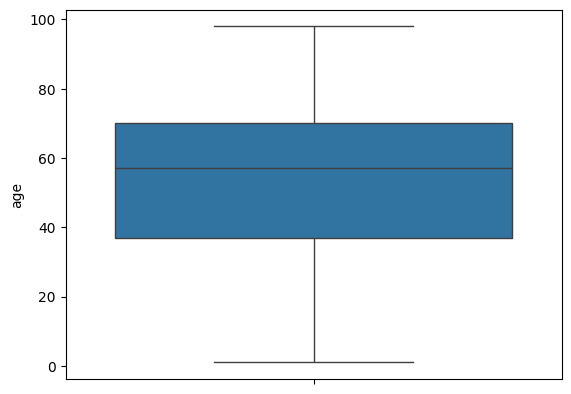

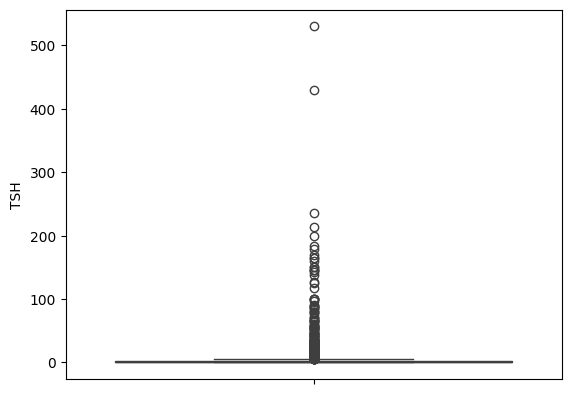

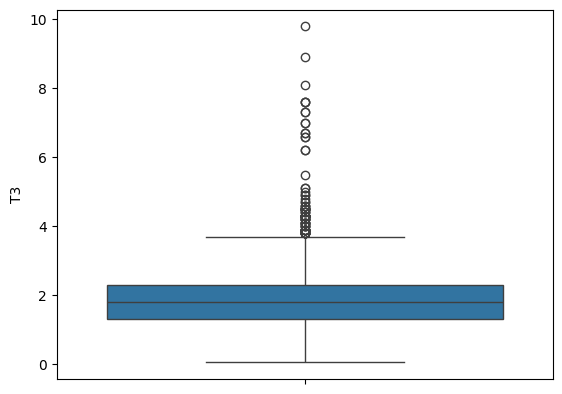

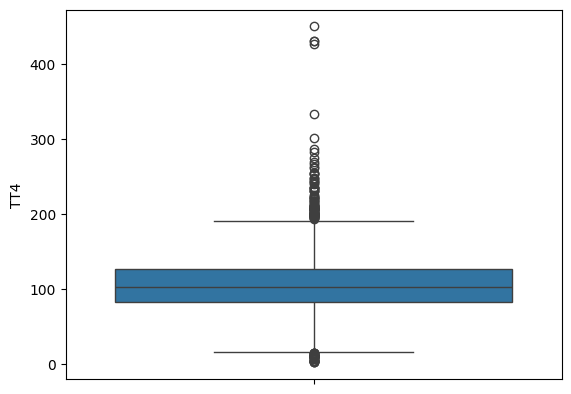

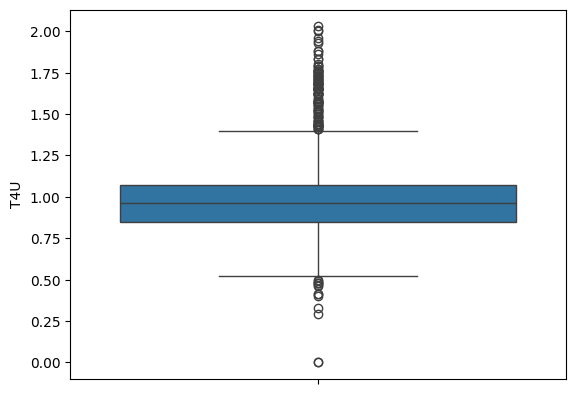

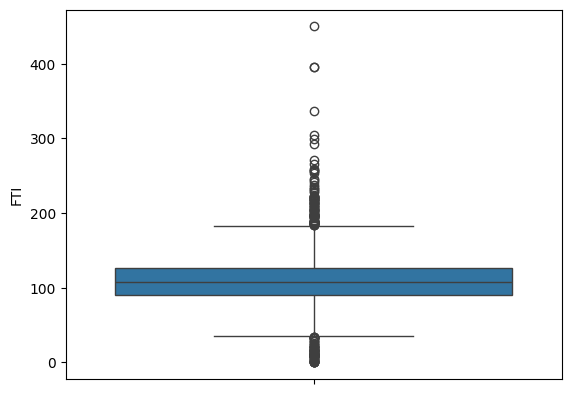

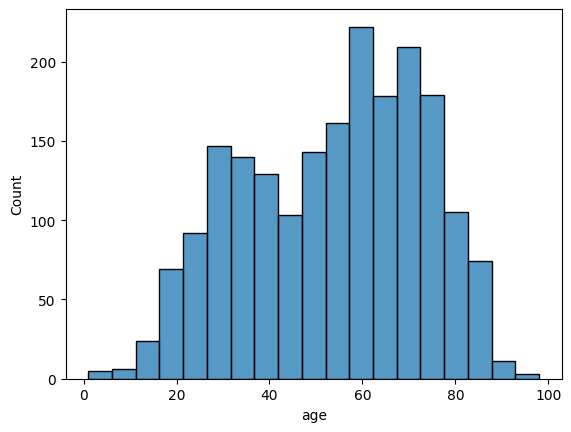

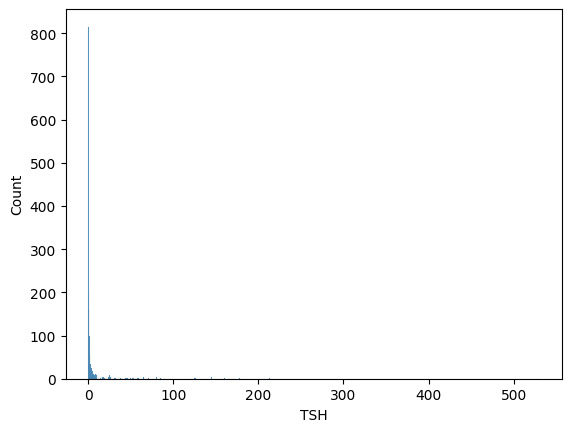

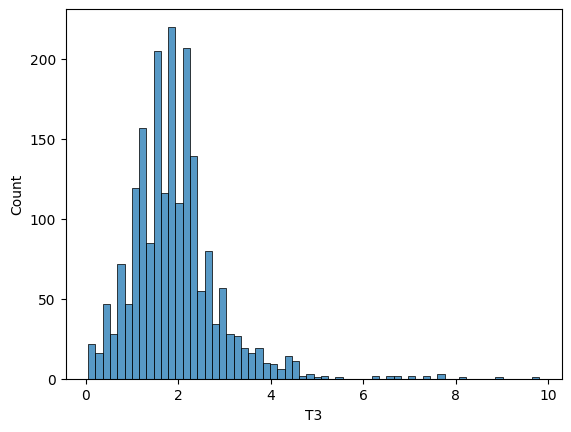

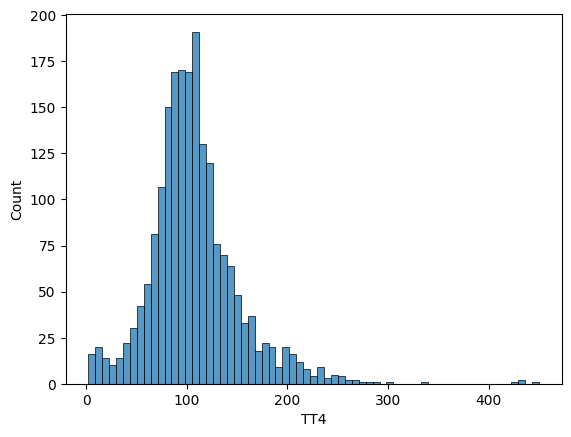

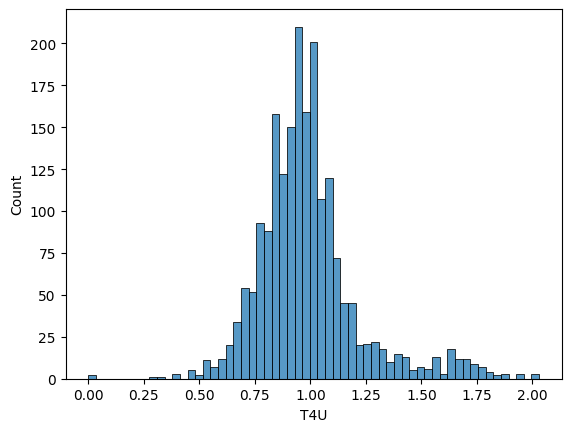

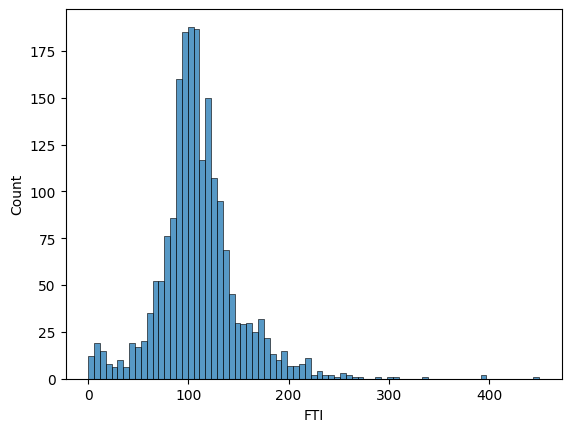

In [21]:
columnas = ["age","TSH","T3","TT4","T4U","FTI"]

for col in columnas:
    sns.boxplot(df[col])
    plt.show()

for col in columnas:
    sns.histplot(df[col])
    plt.show()

<div style="background-color:green;color:white">

A partir de los boxplots mostrados para las variables age, TSH, T3, TT4, T4U y FTI según la variable response:

<br>



<div style="background-color:green;color:white">

Observa los boxplots de las variables age, TSH, T3, TT4, T4U y FTI.

A partir de ellos:

1. Identifica en qué variables aparecen valores atípicos (outliers) y señala cuáles parecen más extremos.

2. Comenta si esos outliers podrían ser valores reales o errores, basándote únicamente en lo que ves en el gráfico.

3. Explica qué acciones considerarías antes de analizar o modelar estos datos (por ejemplo: mantenerlos, transformarlos o tratarlos de alguna forma).

<br>

En todas las variables excepto en age aparecen outliers muy extremos 


<div style="background-color:green;color:white">

Observa los boxplots de las variables que muestran distribuciones muy asimétricas y con valores extremos.

1. **Aplica una transformación logarítmica** a cada una de ellas *log1p*.
2. **Vuelve a representar los boxplots** utilizando los valores transformados.
3. **Compara los gráficos originales y transformados**, explicando cómo cambia la forma de la distribución (asimetría, rango, presencia de outliers).
4. **Indica por qué la transformación logarítmica puede ser útil** en el análisis o en la preparación de un modelo predictivo.

<br>

### 3.2. Análisis de correlaciones entre variables independendientes

<div style="background-color:green;color:white">

Genera un pairplot utilizando todas las variables numéricas del conjunto de datos

<br>

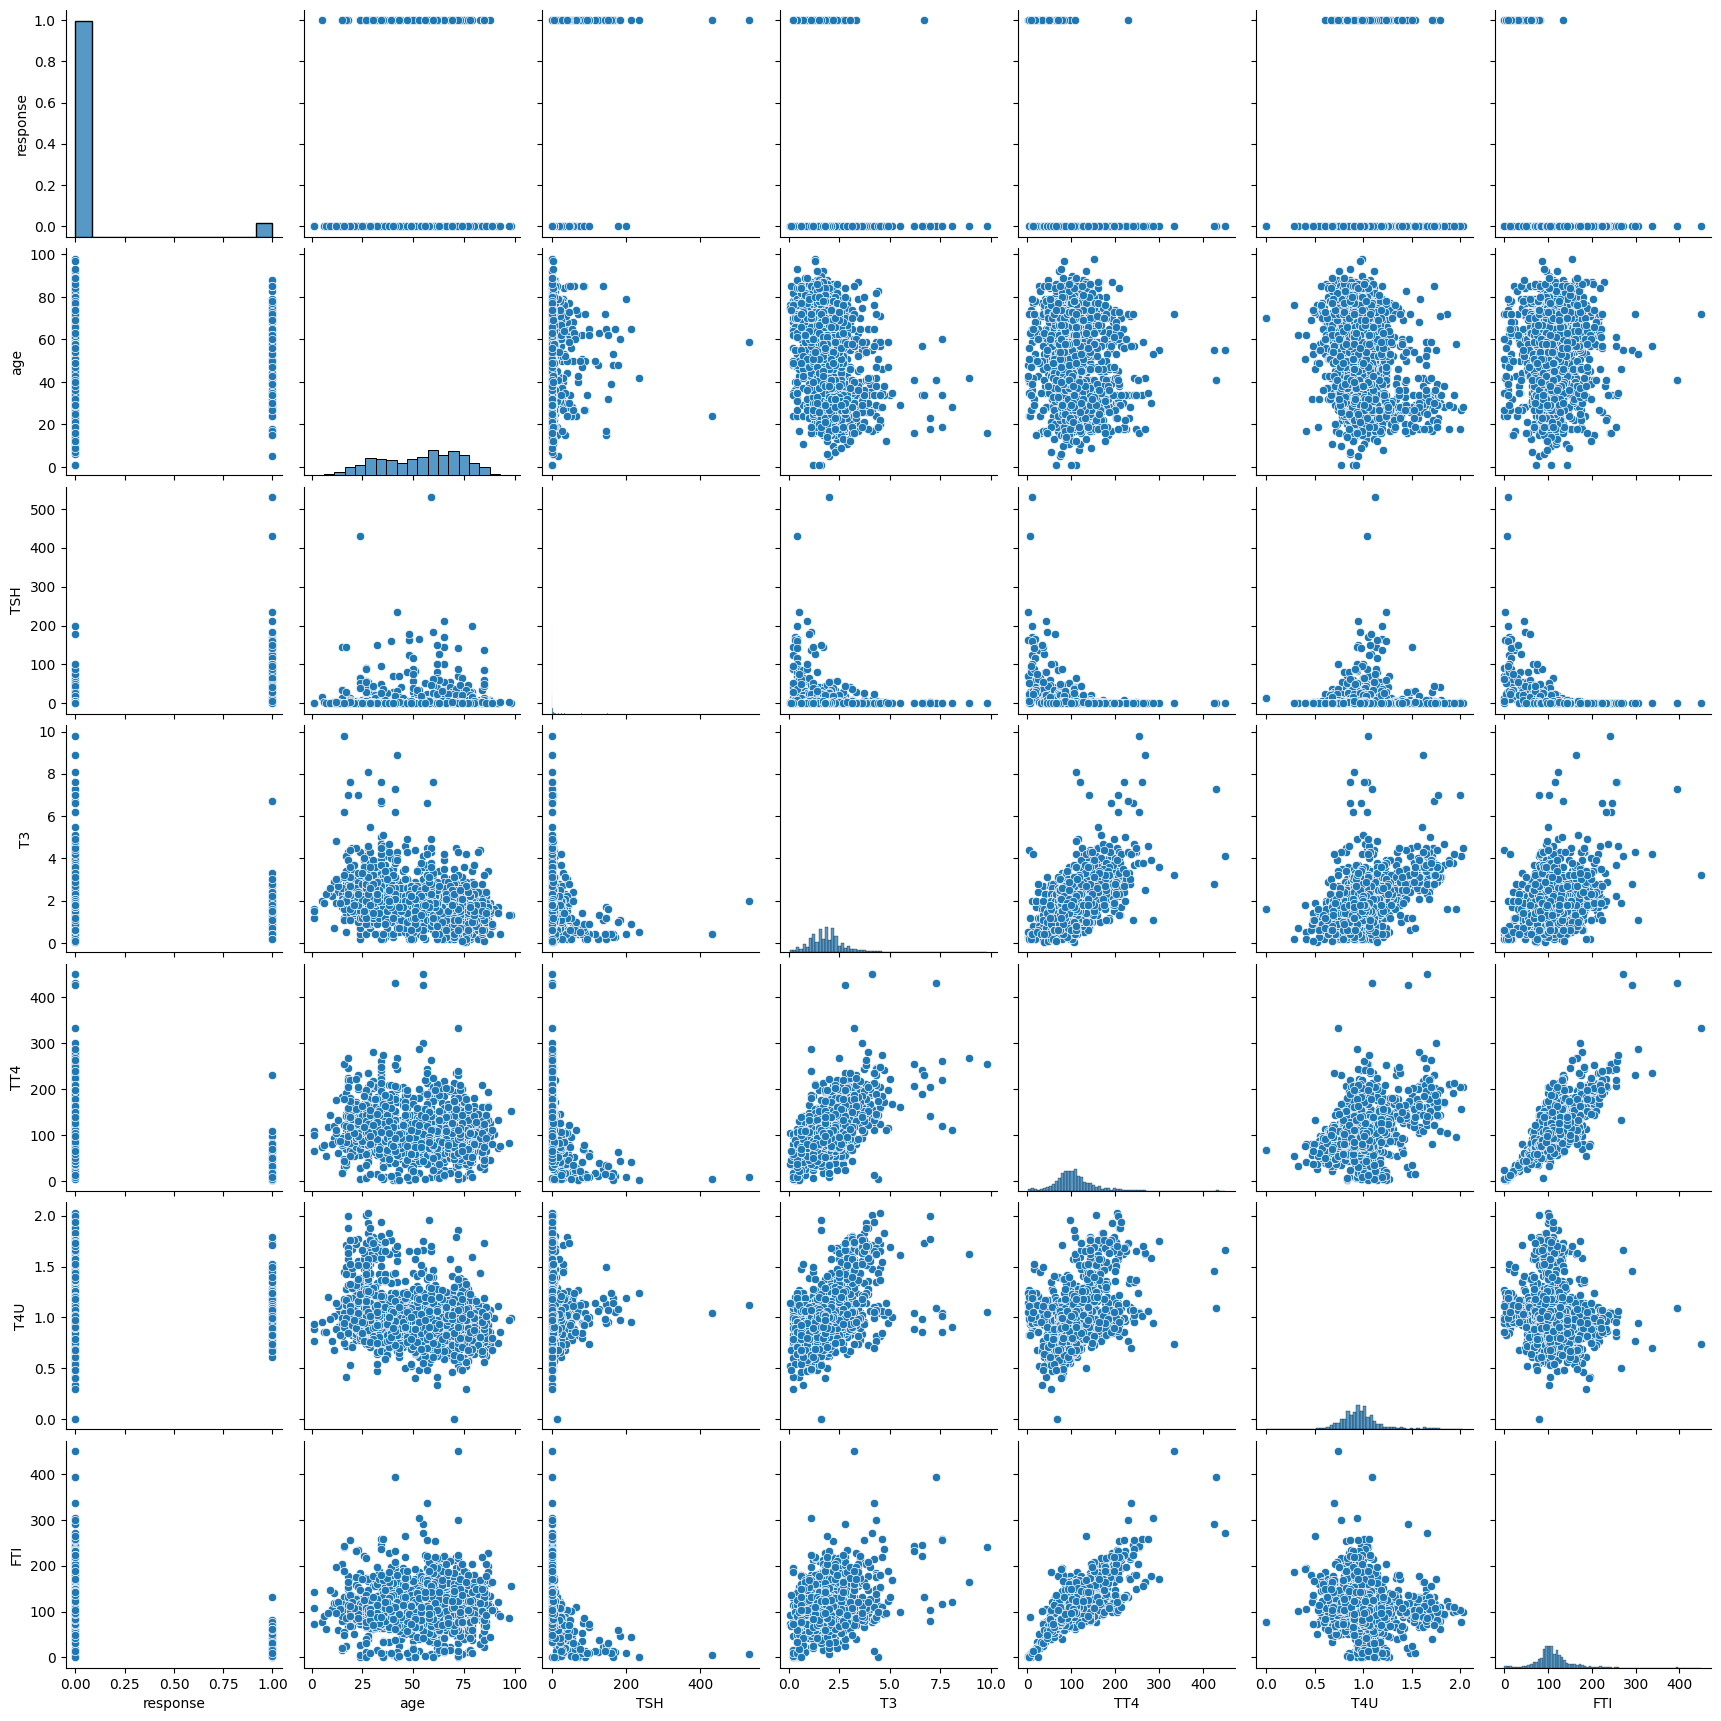

In [22]:
sns.pairplot(df)


<div style="background-color:green;color:white">

Observa el *pairplot* generado con las variables del dataset.

1. **Describe la forma de las distribuciones** que aparecen en la diagonal del gráfico:

   * ¿Qué variables están más concentradas?
   * ¿Cuáles muestran asimetría o valores extremos?

2. **Analiza las relaciones entre pares de variables** en los diagramas de dispersión:

   * ¿Hay alguna relación clara entre dos variables?
   * ¿O la mayoría de pares no muestran patrón?

Escribe un breve resumen con tus observaciones.

<br>

### 3.3. Transformación de datos categóricos con get_dummies

<div style="background-color:green;color:white">

Selecciona las variables categóricas del dataset y conviértelas a variables numéricas usando **`pd.get_dummies()`**.

<br>


In [23]:


df["sex"] = pd.get_dummies(df["sex"] , drop_first=True)
df["on_thyroxine"] = pd.get_dummies(df["on_thyroxine"] , drop_first=True)
df["antithyroid_medication"] = pd.get_dummies(df["antithyroid_medication"], drop_first=True)
df["thyroid_surgery"] = pd.get_dummies(df["thyroid_surgery"],drop_first=True)
df["pregnant"] = pd.get_dummies(df["pregnant"] , drop_first=True)
df["sick"] = pd.get_dummies(df["sick"],drop_first=True)
df["tumor"] = pd.get_dummies(df["tumor"],drop_first=True)
df["lithium"] = pd.get_dummies(df["lithium"],drop_first=True)
df["goitre"] = pd.get_dummies(df["goitre"],drop_first=True)
print(df.dtypes)
df.head()

response                    int64
age                       float64
sex                          bool
on_thyroxine                 bool
antithyroid_medication       bool
thyroid_surgery              bool
pregnant                     bool
sick                         bool
tumor                        bool
lithium                      bool
goitre                       bool
TSH                       float64
T3                        float64
TT4                       float64
T4U                       float64
FTI                       float64
dtype: object


,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72.0,True,False,False,False,False,False,False,False,False,30.0,0.6,15.0,1.48,10.0
1,1,15.0,False,True,False,False,False,False,False,False,False,145.0,1.7,19.0,1.13,17.0
2,1,24.0,True,False,False,False,False,False,False,False,False,0.0,0.2,4.0,1.00,0.0
3,1,24.0,False,False,False,False,False,False,False,False,False,430.0,0.4,6.0,1.04,6.0
4,1,77.0,True,False,False,False,False,False,False,False,False,7.3,1.2,57.0,1.28,44.0


### 3.4. Mapa de calor 

<div style="background-color:green;color:white">

Crear un mapa d calor para ver solo las correlaciones con response

<br>


<Axes: >

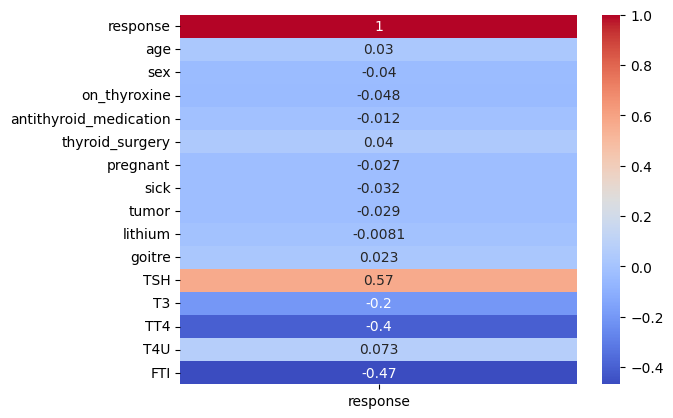

In [24]:
sns.heatmap(df.corr(numeric_only=True)[["response"]] , cmap="coolwarm" , annot=True)

## 4. División del dataset

<div style="background-color:green;color:white">


Separaremos el conjunto de datos en dos partes:

* **X**: incluirá todas las columnas del dataset **excepto la variable *response***.
  Estas serán las **variables predictoras** o características que usará el modelo.

* **y**: contendrá únicamente la columna **response**, que es la **variable objetivo** que queremos predecir.

Una vez creada esta separación, podrás utilizar X e y para entrenar y evaluar los modelos de clasificación.

<br>


In [25]:
from sklearn.model_selection import train_test_split

x = df.drop(columns="response")
y = df["response"]


x_train , x_test,y_train, y_test = train_test_split(x,y,train_size=0.8,random_state=42)

<div style="background-color:green;color:white">


Imprimir la forma de X_train y de X_test

<br>

In [26]:
print(x_train.shape)
print(x_test.shape)

(1600, 15)
(400, 15)


## 5. Creación del modelo de Regresión Logística

<div style="background-color:green;color:white">

Se implementará la regresión logística con regularización Ridge L2(por defecto). [Aquí](https://www.iartificial.net/regularizacion-lasso-l1-ridge-l2-y-elasticnet/) más información sobre los tipos de regularizaciones.

<br>

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="l2")

## 6. Escalado

<div style="background-color:green;color:white">

Escalar las divisiones de las variables independientes (X_train y X_test) correctamente sin fuga de datos.

<br>

In [28]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## 6. Entrenamiento

<div style="background-color:green;color:white">

Entrena el modelo con los datos de entranamiento escalados

<br>

In [29]:
model.fit(x_train,y_train)

LogisticRegression()

## 7. Cálculo de intercept, coefficients y score

<div style="background-color:green;color:white">

1. Calcular el intercepto
2. Calcular coeficinetes junto a sus nombres
3. Calcular recall, precision y F1-score

<br>

In [30]:
# calcular intercepto
interceptor = model.intercept_

In [31]:
 # Calcular coeficinetes junto a sus nombres
coef = model.coef_

print(coef)

print(x.columns)


df_coef = pd.DataFrame(data = coef.ravel(), index=x.columns,columns=["coef"])

print(df_coef)

[[ 0.40576156 -0.18482666 -0.50237396 -0.2746523   0.27961711 -0.17133126
  -0.16648524 -0.27644935 -0.11311781  0.14329042  0.51093338 -0.21791139
  -1.81743237  0.65992347 -2.16531781]]
Index(['age', 'sex', 'on_thyroxine', 'antithyroid_medication',
       'thyroid_surgery', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH', 'T3', 'TT4', 'T4U', 'FTI'],
      dtype='object')
                            coef
age                     0.405762
sex                    -0.184827
on_thyroxine           -0.502374
antithyroid_medication -0.274652
thyroid_surgery         0.279617
pregnant               -0.171331
sick                   -0.166485
tumor                  -0.276449
lithium                -0.113118
goitre                  0.143290
TSH                     0.510933
T3                     -0.217911
TT4                    -1.817432
T4U                     0.659923
FTI                    -2.165318


In [32]:
# Calcular recall, precision y F1-score

y_pred = model.predict(x_test)

from sklearn.metrics import recall_score,precision_score,f1_score , accuracy_score

print("recall:",recall_score(y_test,y_pred))
print("precsion:",precision_score(y_test,y_pred))
print("F1:",f1_score(y_test,y_pred))

recall: 0.782608695652174
precsion: 0.9473684210526315
F1: 0.8571428571428571


## 8. Predicciones

Para las regresiones logísticas, el método `predict_proba` estima la probabilidad de ser de tipo 0 (NO) y la probabilidad de ser de tipo 1(YES).

In [33]:
# Fijamos el umbral de decisión al 50%

prob_threshold = 0.5

In [34]:
# Obtenemos las probabilidades predichas para las primeras 10 muestras de X_test.
# predict_proba devuelve dos columnas: prob(clase_0) y prob(clase_1),
# en el orden indicado por clf1.classes_.
prob_df = pd.DataFrame(
    model.predict_proba(x_test[:10]),
    columns=['Prob of NO', 'Prob of YES']
)

# Tomamos la probabilidad de la clase positiva (1, "YES") y aplicamos el umbral.
# Si Prob_of_YES > 0.5 → 1 ; en otro caso → 0
prob_df['Decision'] = (prob_df['Prob of YES'] > prob_threshold).astype(int)

# Mostramos las probabilidades y la decisión final
prob_df

,Prob of NO,Prob of YES,Decision
0,0.997812,0.002188,0
1,0.996699,0.003301,0
2,0.999991,0.000009,0
3,0.616518,0.383482,0
4,0.999179,0.000821,0
5,0.868201,0.131799,0
6,0.987956,0.012044,0
7,0.997839,0.002161,0
8,0.268704,0.731296,1
9,0.999899,0.000101,0


In [35]:
# Mostramos las etiquetas reales correspondientes a esas mismas 10 muestras
y_test[:10]

2944    0
511     0
2116    0
1412    0
2039    0
2013    0
1478    0
2744    0
83      1
2100    0
Name: response, dtype: int64

## 9. Informe de classificación (classification report) y matriz de confusión (confusion matrix)

<div style="background-color:green;color:white">

Crear la matriz de confusión y el reporte de clasificación

<br>

In [36]:
# Matriz de confusión


from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test,y_pred))


[[376   1]
 [  5  18]]


In [37]:
# reporte de clasificación

from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       377
           1       0.95      0.78      0.86        23

    accuracy                           0.98       400
   macro avg       0.97      0.89      0.92       400
weighted avg       0.98      0.98      0.98       400




# **Práctica Dataset del Titanic**


<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" alt="Titanic Sinking, engraving by Willy Stöwer." width="600">


El *Titanic* es uno de los conjuntos de datos más conocidos en análisis de datos y aprendizaje automático. Procede del naufragio del RMS Titanic en 1912 y describe las características de los pasajeros que viajaban a bordo, junto con una columna clave: **Survived**, que indica si el pasajero sobrevivió (1) o no sobrevivió (0).

El dataset contiene información real extraída de los registros del barco e incluye, entre otras:

* **Pclass**: clase del billete (1ª, 2ª o 3ª)
* **Name**: nombre del pasajero
* **Sex**: sexo
* **Age**: edad
* **SibSp**: número de hermanos o cónyuges a bordo
* **Parch**: número de padres o hijos a bordo
* **Ticket**: número de billete
* **Fare**: tarifa pagada
* **Cabin**: cabina asignada
* **Embarked**: puerto de embarque
* **Survived**: objetivo (0 = no sobrevivió, 1 = sí sobrevivió)

Este conjunto de datos es especialmente útil para practicar tareas típicas de ciencia de datos:

1. **Exploración y análisis visual**
   Comprender qué factores pudieron influir en la supervivencia, como el sexo, la edad o la clase del pasajero.

2. **Limpieza y preprocesamiento**

   * Rellenar valores faltantes (por ejemplo, edad).
   * Eliminar columnas que no aportan valor.
   * Convertir variables categóricas en variables numéricas mediante *dummies*.

3. **Construcción de un modelo predictivo**
   Se pide utilizar una **Regresión Logística**, un modelo clásico para problemas de clasificación binaria, con el objetivo de predecir si un pasajero sobrevivió.

4. **Evaluación del modelo**
   A partir de predicciones sobre un conjunto de prueba, se espera:

   * Generar un **classification report** (precision, recall, F1).
   * Construir la **matriz de confusión**.

5. **Interpretación de resultados**
   Analizar qué factores influyen en la probabilidad de supervivencia mediante los coeficientes del modelo.

---

## **Objetivo de la práctica**

Al finalizar esta actividad, el alumno debe ser capaz de:

* Cargar y explorar un dataset real con Python.
* Detectar patrones relevantes mediante visualizaciones.
* Preprocesar correctamente datos con valores faltantes y variables categóricas.
* Entrenar un modelo de Regresión Logística correctamente.
* Evaluar su calidad mediante métricas adecuadas.
* Interpretar tanto los gráficos como los coeficientes del modelo.




<div style="background-color:green;color:white">

## **1. Carga del dataset**

1. Carga el fichero titanic_train.csv.

<br>


In [38]:
train = pd.read_csv("data/titanic_train.csv")

<div style="background-color:green;color:white">

2. Muestra:

   * las primeras 5 filas,
   * el número de filas y columnas
   * el tipo de datos de las columnas
   * el número de valores nulos por columna.

¿Qué columnas contienen valores nulos?

<br>

In [39]:
# Display the first few rows of the DataFrame
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
# Display the shape of the DataFrame
train.shape


(891, 12)

In [41]:
# Display the data types of each column in the DataFrame
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [42]:
# Check for missing values in each column
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<div style="background-color:green;color:white">


## **2. Visual EDA (Análisis Exploratorio)**

---

### **2.1. Supervivencia por sexo**

Mostrar un gráfico con la tasa de supervivencia por sexo

1. ¿Qué sexo presenta mayor supervivencia?
2. ¿La diferencia parece grande o pequeña?

<br>

Text(0, 0.5, 'Tasa')

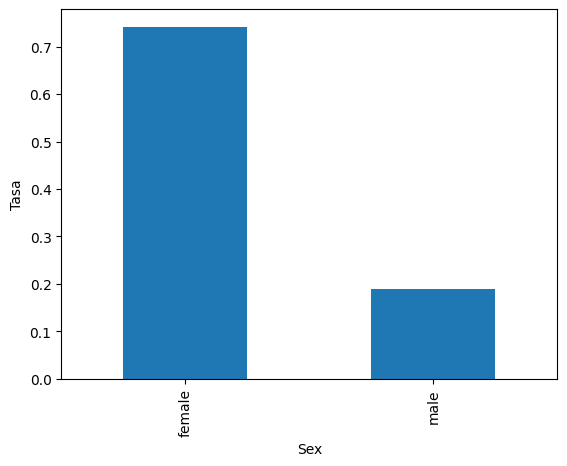

In [43]:
super = train.groupby('Sex')['Survived'].mean()

super.plot(kind='bar')
plt.ylabel("Tasa")

<div style="background-color:green;color:white">

### **2.1. Supervivencia por clase (Pclass)**

Mostrar un gráfico con la tasa de supervivencia por clase

1. ¿Los pasajeros de primera clase sobrevivieron más?
2. ¿Qué clase tiene la menor supervivencia?

<br>

Text(0, 0.5, 'Tasa')

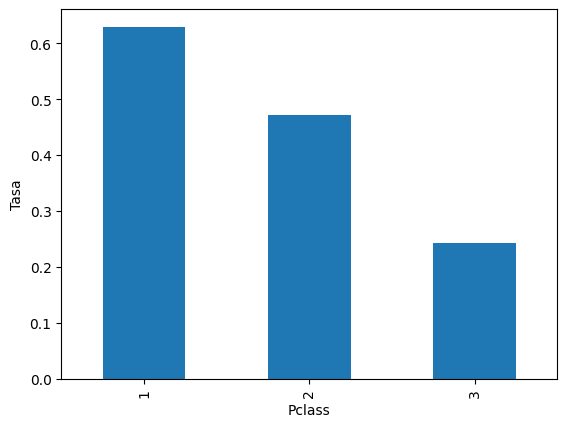

In [44]:
super = train.groupby('Pclass')['Survived'].mean()

super.plot(kind='bar')
plt.ylabel("Tasa")

<div style="background-color:green;color:white">

### **2.3. Histograma de edades**

1. ¿Hay más adultos jóvenes que mayores?
2. ¿La distribución es aproximadamente normal o está sesgada?

<br>

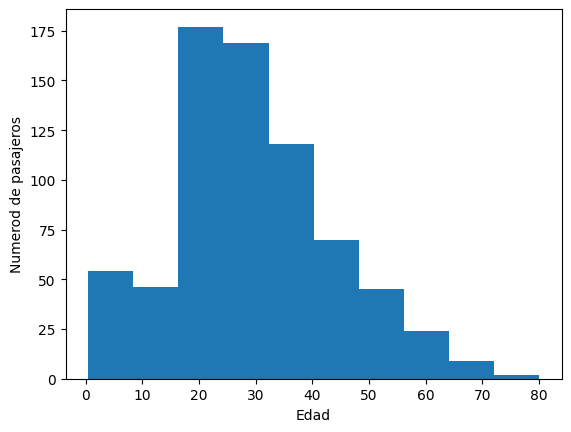

In [45]:
plt.hist(train["Age"])
plt.xlabel("Edad")
plt.ylabel("Numerod de pasajeros")
plt.show()

<div style="background-color:green;color:white">

### **2.4. Relación clase–edad**

1. ¿Los pasajeros de 1ª clase son más mayores de media?
2. ¿Qué clase tiene más variabilidad de edad?

<br>

Text(0, 0.5, 'Edad')

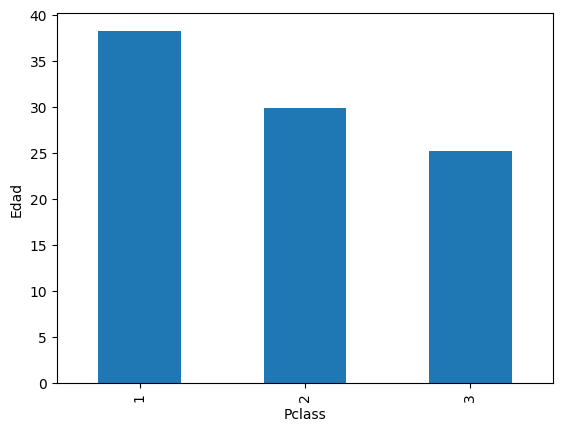

In [46]:
super = train.groupby('Pclass')['Age'].mean()

super.plot(kind='bar')
plt.ylabel("Edad")

<div style="background-color:green;color:white">


# **3. Preprocesamiento**
--

### **3.1. Sustituir valores faltantes**

¿Por qué podría ser problemático usar la media como relleno?

<br>


In [47]:
print(train.isna().sum())
train['Age'] = train['Age'].fillna(train['Age'].median)
train['Cabin'] = train['Cabin'].fillna(train['Cabin'].mode()[0])
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<div style="background-color:green;color:white">

### **3.2. Suprimir columnas innecesarias**

1. ¿Por qué “Cabin” suele considerarse una mala columna para este modelo?

<br>

Porque los datos son muy uniformes y no aportan información

In [48]:
train = train.drop(columns=["Name","Ticket","Cabin","Embarked"])

<div style="background-color:green;color:white">


### **3.3. Crear variables dummy**

1. ¿Por qué usamos *drop_first=True*?
2. ¿Qué problema evitamos?

<br>

In [49]:
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')
train["Sex"] = pd.get_dummies(train["Sex"],drop_first=True)

train['Age'] = train['Age'].fillna(train['Age'].median())

print(train.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Sex               bool
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object


<div style="background-color:green;color:white">


# **4. Entrenamiento**

### **4.1 Separación de variables (X, y)**

Separar las variables independientes (X) y variable objetivo (y)




<br>

In [50]:
x = train.drop(columns="Survived")
y = train["Survived"]

    

<div style="background-color:green;color:white">


### **4.2 División del conjunto de datos en entrenamiento y prueba**

<br>

In [51]:
x_train, x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=42)

<div style="background-color:green;color:white">


### **4.3 Escalado de datos / Normalización**

<br>

In [52]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

<div style="background-color:green;color:white">


# **6. Creación del modelo**

1. Buscar en la [documentación de scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) cual es el valor por defecto de *max_iter* y para que sirve al crear el modelo de regresion logistica
2. Cambiarlo a 200.

<br>

In [53]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty="l2", max_iter=200)


<div style="background-color:green;color:white">


# **7. Entrenamiento del modelo**

1. ¿Por qué dividimos en train/test?
2. ¿Qué hace *random_state=42*?

<br>

In [54]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

<div style="background-color:green;color:white">

# **8. Evaluación: Matriz de confusión e informe de clasificación**

1. ¿Qué representan TP, TN, FP, FN en la matriz de confusión?
2. ¿Qué métrica mide la capacidad de detectar realmente a los supervivientes (clase 1)?
3. ¿Qué métrica combina precisión y recall en una sola?
4. ¿Por qué la accuracy puede ser engañosa en problemas desbalanceados?


<br>

In [55]:
y_pred = model.predict(x_test)

print(confusion_matrix(y_test,y_pred))

print(classification_report(y_test,y_pred))

print("Precisión del modelo:", accuracy_score(y_test, y_pred))
print("f1:", f1_score(y_test, y_pred))
print("recall del modelo:", recall_score(y_test, y_pred))

[[91 14]
 [21 53]]
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       105
           1       0.79      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179

Precisión del modelo: 0.8044692737430168
f1: 0.75177304964539
recall del modelo: 0.7162162162162162




# 8.1 Cálculo de intercept, coefficients y score

<div style="background-color:green;color:white">

1. Calcular el intercepto
2. Calcular coeficinetes junto a sus nombres
3. Calcular recall, precision y F1-score



* ¿En qué caso preferirías optimizar recall en vez de precision?


* Cuando fallar un positivo es muy costoso (en medicina, seguridad, etc.).

<br>

In [56]:
# calcular intercepto

In [57]:
# Calcular coeficinetes junto a sus nombres

In [58]:
# Calcular recall, precision y F1-score

# 9. Probar diferentes umbrales de clasificación

<div style="background-color:green;color:white">



**Pregunta**

1. ¿Qué ocurre con recall al bajar el umbral?
2. ¿Y con precision?

<br>

# 10. Predicción 


A continuación, vas a utilizar el modelo de **Regresión Logística ya entrenado** para predecir la supervivencia de nuevos pasajeros del Titanic.
El objetivo es comprobar si el pipeline completo (creación del DataFrame → escalado → predicción) funciona correctamente.

### **1. Pasajero A (real del dataset Titanic)**

* *PassengerId:* 892
* *Pclass:* 3
* *Age:* 28
* *SibSp:* 0
* *Parch:* 0
* *Fare:* 7.25
* *Sex:* male
* *Embarked:* S

---

### **2. Pasajero B (real del dataset Titanic)**

* *PassengerId:* 893
* *Pclass:* 1
* *Age:* 38
* *SibSp:* 1
* *Parch:* 0
* *Fare:* 71.28
* *Sex:* female
* *Embarked:* C

---

### **3. Pasajero C (inventado por ti)**

Crea un pasajero ficticio con los siguientes requisitos:

* Tiene que ser **coherente** (edad, tarifa, clase…)
* Debes elegir sexo, edad y puerto de embarque
* Debes justificar brevemente si esperas que sobreviva o no y por qué

Ejemplo de lo que debes rellenar:

* *PassengerId:* 999
* *Pclass:* ___
* *Age:* ___
* *SibSp:* ___
* *Parch:* ___
* *Fare:* ___
* *Sex:* ___
* *Embarked:* ___

<div style="background-color:green;color:white">

Para los tres pasajeros:

1. Construye un DataFrame con las **9 columnas** usadas por el modelo:

   
   PassengerId, Pclass, Age, SibSp, Parch, Fare,
   Sex_male, Embarked_Q, Embarked_S
   

2. Convierte *Sex* y *Embarked* en las dummies correspondientes.

3. Aplica el mismo escalado que se usó en el entrenamiento  
  
4. Obtén:

   * La predicción (*0=NO*, *1=YES*)
   * La probabilidad de supervivencia (*predict_proba*)

5. Interpreta el resultado.

<br>